In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import copy
warnings.simplefilter("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']   #设置简黑字体
plt.rcParams['axes.unicode_minus'] = False # 解决‘-’bug

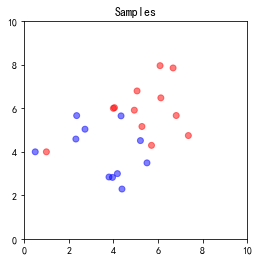

In [2]:
np.random.seed(4342)

x1 = np.random.rand(10, 2) * 4 + 2 
y1 = [0] * len(x1)

x2 = np.random.rand(10, 2) * 4 + 4
y2 = [1] * len(x2)

xt = np.array([
    [1, 4],
    [0.5, 4],
    [4, 6],
])
yt = np.array([1, 0, 1])

x = np.concatenate([x1, x2, xt], axis=0)
y = np.concatenate([y1, y2, yt])


plt.figure(figsize=(4, 4))
plt.title("Samples")
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="bwr", alpha=0.5)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

# 构建决策树

In [3]:
class Node(object):
    def __init__(self, pX, pY, pName, pLevel):
        self.samples = pX
        self.label = pY
        self.name = pName 
        self.level = pLevel
        self.gini = None
        self.getGini()
        self.is_leaf = False 
        self.getIsLeaf()
        self.split_c = None 
        self.split_t = None 
        self.split_children = None 
        self.split_child_left = None 
        self.split_child_right = None 
        self.split_gini_index = None 
        pass
    
    def getNodeShow(self):
        print(f"name={self.name}, level={self.level}, samples={len(self.samples)}, gini={self.gini}, is_leaf = {self.is_leaf}")
        print(f"--> split_c={self.split_c}, split_t={self.split_t}, split_gini_index={self.split_gini_index}")
        pass
    
    def getIsLeaf(self):
        if self.gini == 0 or len(self.label) <=1:
            self.is_leaf = True
    
    def getGini(self):
        counts = len(self.label)
        tmp_dict = dict()
        for i in self.label:
            if i in tmp_dict.keys():
                tmp_dict[i] += 1
            else:
                tmp_dict[i] = 1
        tmp_value = np.array([float(i) for i in tmp_dict.values()])
        tmp_p = tmp_value / counts
        tmp_p2 = tmp_p ** 2
        tmp_gini = 1 - np.sum(tmp_p2)
        self.gini = tmp_gini
        
    def split(self):
        
        if self.is_leaf:
            return 
        
        cols = range(self.samples.shape[1])
        # print(cols)
        
        # 最佳分裂信息（特征、阈值、左子集、右子集、gini系数减少）
        best_gini_index = 100.0
        best_c = None 
        best_t = None 
        best_left_child = None 
        best_right_child = None 
        
        # 遍历特征
        for c in cols:
            tmp_feature = copy.copy(self.samples[:, c])
            tmp_feature.sort()
            
            # 生成候选分裂节点集合
            tmp_condicate = [tmp_feature[0] - 0.5]
            for i in range(len(tmp_feature)-1):
                if tmp_feature[i] != tmp_feature[i+1]:
                    tmp_con = (tmp_feature[i] + tmp_feature[i+1])/2
                    tmp_condicate.append(tmp_con)
            tmp_condicate.append(tmp_feature[-1] + 0.5)
            
            # 分解样本集
            tmp_samples = copy.copy(self.samples[:, c])

            for s in tmp_condicate:
                tmp_label = list()
                
                tmp_nodes_left_x = list()
                tmp_nodes_left_y = list()
                tmp_nodes_left_samples = 0 

                tmp_nodes_right_x = list()
                tmp_nodes_right_y = list()
                tmp_nodes_right_samples = 0
                
                for idx, value in enumerate(tmp_samples):
                    if value <= s:
                        tmp_label.append(0)
                        tmp_nodes_left_x.append(self.samples[idx])
                        tmp_nodes_left_y.append(self.label[idx])
                        tmp_nodes_left_samples += 1
                    else:
                        tmp_label.append(1) 
                        tmp_nodes_right_x.append(self.samples[idx])
                        tmp_nodes_right_y.append(self.label[idx])
                        tmp_nodes_right_samples += 1
             
                tmp_nodes_left_x = np.array(tmp_nodes_left_x)
                tmp_nodes_left_y = np.array(tmp_nodes_left_y)
                tmp_nodes_right_x = np.array(tmp_nodes_right_x)
                tmp_nodes_right_y = np.array(tmp_nodes_right_y)
            
                tmp_node_left = Node(tmp_nodes_left_x, tmp_nodes_left_y, self.name+'-0', self.level+1)
                tmp_node_right = Node(tmp_nodes_right_x, tmp_nodes_right_y, self.name+'-1', self.level+1)
                
                
                # 子集的gini系数减少情况
                tmp_nums = tmp_nodes_left_samples + tmp_nodes_right_samples
                tmp_rate_left= tmp_nodes_left_samples / tmp_nums
                tmp_rate_right = tmp_nodes_right_samples / tmp_nums
                
                gini_index = tmp_rate_left * tmp_node_left.gini + tmp_rate_right * tmp_node_right.gini 

                if gini_index <= best_gini_index:
                    best_gini_index = gini_index
                    best_c = c 
                    best_t = s 
                    best_left_child = tmp_node_left
                    best_right_child = tmp_node_right

                pass
            
        self.split_c = best_c 
        self.split_t = best_t 
        self.split_children = [best_left_child, best_right_child]
        self.split_child_left = best_left_child
        self.split_child_right = best_right_child
        self.split_gini_index = best_gini_index  
        
    pass
    


# node_root = Node(x, y, "root", 0)
# print(node_root.is_leaf)
# node_root.getNodeShow()
# node_root.split()
# print(node_root.split_c)
# print(node_root.split_t)
# print(node_root.split_gini_index)
# print(node_root.split_children)
# print(node_root.split_child_left)
# print(node_root.split_child_right)
# node_root.split_child_left.getNodeShow()
# node_root.split_child_right.getNodeShow()

# 广度优先节点分裂

In [4]:
node_root = Node(x, y, "root", 0)
que = [node_root]
for item in que:
    print(item.name)
    item.split()
    for itemc in item.split_children:
        print(f"--> {itemc.name}, is_leaf = {itemc.is_leaf}, type = {type(itemc)}")
        if itemc.is_leaf is False:
            que.append(itemc)
            print(f"-----> {itemc.name} append...")

root
--> root-0, is_leaf = False, type = <class '__main__.Node'>
-----> root-0 append...
--> root-1, is_leaf = True, type = <class '__main__.Node'>
root-0
--> root-0-0, is_leaf = False, type = <class '__main__.Node'>
-----> root-0-0 append...
--> root-0-1, is_leaf = False, type = <class '__main__.Node'>
-----> root-0-1 append...
root-0-0
--> root-0-0-0, is_leaf = False, type = <class '__main__.Node'>
-----> root-0-0-0 append...
--> root-0-0-1, is_leaf = True, type = <class '__main__.Node'>
root-0-1
--> root-0-1-0, is_leaf = True, type = <class '__main__.Node'>
--> root-0-1-1, is_leaf = True, type = <class '__main__.Node'>
root-0-0-0
--> root-0-0-0-0, is_leaf = True, type = <class '__main__.Node'>
--> root-0-0-0-1, is_leaf = True, type = <class '__main__.Node'>


# 节点信息打印

In [5]:
que = [node_root]
for node in que:    
    if node.is_leaf is True:
        node.getNodeShow()
        pass  
    if node.split_children is not None:
        for item in node.split_children:
            if item is not None:
                que.append(item)

name=root-1, level=1, samples=8, gini=0.0, is_leaf = True
--> split_c=None, split_t=None, split_gini_index=None
name=root-0-0-1, level=3, samples=9, gini=0.0, is_leaf = True
--> split_c=None, split_t=None, split_gini_index=None
name=root-0-1-0, level=3, samples=1, gini=0.0, is_leaf = True
--> split_c=None, split_t=None, split_gini_index=None
name=root-0-1-1, level=3, samples=3, gini=0.0, is_leaf = True
--> split_c=None, split_t=None, split_gini_index=None
name=root-0-0-0-0, level=4, samples=1, gini=0.0, is_leaf = True
--> split_c=None, split_t=None, split_gini_index=None
name=root-0-0-0-1, level=4, samples=1, gini=0.0, is_leaf = True
--> split_c=None, split_t=None, split_gini_index=None


# 决策边界

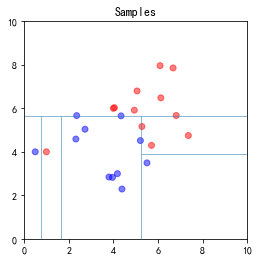

In [6]:
plt.figure(figsize=(4, 4))
plt.title("Samples")
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="bwr", alpha=0.5)
plt.hlines(y=5.6681, xmin=0, xmax=10, linewidth=1, alpha=0.5)
plt.vlines(x=5.2463, ymin=0, ymax=5.6681, linewidth=1, alpha=0.5)
plt.vlines(x=1.6601, ymin=0, ymax=5.6681, linewidth=1, alpha=0.5)
plt.hlines(y=3.8946, xmin=5.2463, xmax=10, linewidth=1, alpha=0.5)
plt.vlines(x=0.75, ymin=0, ymax=5.6681, linewidth=1, alpha=0.5)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

# 决策树分类外部数据

In [7]:
idx = np.arange(-0, 10, 0.01)
idy = np.arange(-0, 10, 0.01)

idxx, idyy = np.meshgrid(idx, idy)
idt = np.c_[idxx.ravel(), idyy.ravel()]
# print(idt)
# print(idt.shape)

In [8]:
node = node_root
node.out_px = copy.copy(idt)

que = [node_root]
for node in que:    
    print(node.name)

    flag = node.is_leaf
    if flag is True:
        node.pre_label = node.label[0]
        print(f"----------------------> Flag = {flag}")
        print(f"----------------------> node.out_px = {node.out_px.shape}")
        print(f"----------------------> pre_label = {node.pre_label}")
        continue 
    
    c = node.split_c
    print(f"--> c = {c}")
    
    t = node.split_t
    print(f"--> t = {t}")
    
    f = node.out_px[:, c]
    # print(f"--> f = {f}")
    
    s = np.where(f<=t, 0, 1)
    print(f"--> s.shape = {s.shape}")
    
    sl = node.out_px[s==0]
    sr = node.out_px[s==1]
    schild = [sl, sr]
    print(f"--> sl.shape = {sl.shape}")
    print(f"--> sr.shape = {sr.shape}")
    
    if flag is False:
        print(f"--> flag = {flag}")
        for i, node_child in enumerate(node.split_children):
            node_child.out_px = schild[i]
            print(f"-->--> i = {i}")
            print(f"-->--> node_child.name = {node_child.name}")   
            print(f"-->--> node_child.out_px = {node_child.out_px.shape}")         
    
    if node.split_children is not None:
        for item in node.split_children:
            if item is not None:
                que.append(item)

root
--> c = 1
--> t = 5.668129037891472
--> s.shape = (1000000,)
--> sl.shape = (567000, 2)
--> sr.shape = (433000, 2)
--> flag = False
-->--> i = 0
-->--> node_child.name = root-0
-->--> node_child.out_px = (567000, 2)
-->--> i = 1
-->--> node_child.name = root-1
-->--> node_child.out_px = (433000, 2)
root-0
--> c = 0
--> t = 5.246347217103983
--> s.shape = (567000,)
--> sl.shape = (297675, 2)
--> sr.shape = (269325, 2)
--> flag = False
-->--> i = 0
-->--> node_child.name = root-0-0
-->--> node_child.out_px = (297675, 2)
-->--> i = 1
-->--> node_child.name = root-0-1
-->--> node_child.out_px = (269325, 2)
root-1
----------------------> Flag = True
----------------------> node.out_px = (433000, 2)
----------------------> pre_label = 1
root-0-0
--> c = 0
--> t = 1.6601722092269542
--> s.shape = (297675,)
--> sl.shape = (94689, 2)
--> sr.shape = (202986, 2)
--> flag = False
-->--> i = 0
-->--> node_child.name = root-0-0-0
-->--> node_child.out_px = (94689, 2)
-->--> i = 1
-->--> node_ch

# 决策边界背景

In [9]:
# node_root.split_child_right.is_leaf
# node_root.split_child_right.label
# node_root.split_child_right.pre_label
# node_root.split_child_right.out_px

In [10]:
que = [node_root]
ls_output = list()
ls_label = list()
for node in que:    
    if node.is_leaf is True:
        ls_output.append(node.out_px)
        ls_label.append(np.array([node.pre_label] * len(node.out_px)).reshape(-1, 1))
        pass  
    if node.split_children is not None:
        for item in node.split_children:
            if item is not None:
                que.append(item)

In [11]:
tmp_arr_ls = list()
for i in range(len(ls_output)):
    tmp_arr1 = ls_output[i]
    tmp_arr2 = ls_label[i]
    tmp_arr = np.concatenate([tmp_arr1, tmp_arr2], axis=1)
    tmp_arr_ls.append(tmp_arr)
id_arr = np.concatenate(tmp_arr_ls)  
# id_arr = np.sort(id_arr, axis=0)

In [12]:
df1 = pd.DataFrame(idt, columns=["a", "b"])
df2 = pd.DataFrame(id_arr, columns=["a", "b", "c"])
df3 = df1.merge(df2, how="left", on=["a", "b"])

In [13]:
xxx = df3.iloc[:, 0:1].values.reshape(1000, 1000)
yyy = df3.iloc[:, 1:2].values.reshape(1000, 1000)
zzz = df3.iloc[:, 2:3].values.reshape(1000, 1000).astype(int)

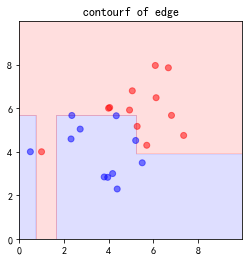

In [14]:
plt.figure(figsize=(4,4))
plt.title("contourf of edge")
plt.contourf(xxx, yyy, zzz, alpha=0.15, cmap="bwr")
plt.scatter(x[:, 0].ravel(), x[:, 1].ravel(), c=y, alpha=0.5, cmap="bwr")
plt.show()